In [5]:
# packages for data analysis
import numpy as np
import pandas as pd

# we are working with Support Vector Machine
from sklearn import svm

# visualize data
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# This is just because we are working on Jupyter notebook, we need this to display graphs on the screen
%matplotlib inline

In [8]:
# Read the file 
recipes = pd.read_csv('Cupcakes vs Muffins.csv')

print(recipes.head())
print(recipes)

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0
       Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0    Muffin     55    28      3       7    5              2        0     0
1    Muffin     47    24     12       6    9              1        0     0
2    Muffin     47    23     18       6    4              1        0     0
3    Muffin     45    11     17      17    8              1        0     0
4    Muffin     50    25     12       6    5              2        1     0
5    Muffin     55    27      3       7    5              2        1     0
6    Muffin     54    27      7      

C:\Users\borja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


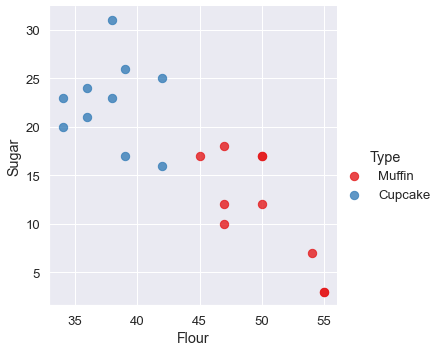

In [10]:
# plot our data
sns.lmplot('Flour','Sugar',data=recipes,hue='Type',
          palette='Set1',fit_reg=False,scatter_kws={"s":70});

In [14]:
# format or pre-process our data
type_label = np.where(recipes['Type']=='Muffin',0,1)
recipe_features = recipes.columns.values[1:].tolist()
recipe_features
ingredients = recipes[['Flour','Sugar']].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [16]:
# fit model
# svc is a classifier (what we are looking for)
model = svm.SVC(kernel = 'linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [20]:
# Get the separating hyperplane
# Mathematics for getting the parameters of the hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
# Creating a the X axis
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0]/w[1])
print(yy)

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])
print(yy_down)
print(yy_up)

[ 1.15779472e+16  1.10528750e+16  1.05278028e+16  1.00027306e+16
  9.47765844e+15  8.95258624e+15  8.42751405e+15  7.90244185e+15
  7.37736965e+15  6.85229746e+15  6.32722526e+15  5.80215306e+15
  5.27708087e+15  4.75200867e+15  4.22693647e+15  3.70186428e+15
  3.17679208e+15  2.65171988e+15  2.12664769e+15  1.60157549e+15
  1.07650329e+15  5.51431096e+14  2.63588995e+13 -4.98713297e+14
 -1.02378549e+15 -1.54885769e+15 -2.07392989e+15 -2.59900208e+15
 -3.12407428e+15 -3.64914648e+15 -4.17421867e+15 -4.69929087e+15
 -5.22436307e+15 -5.74943526e+15 -6.27450746e+15 -6.79957966e+15
 -7.32465185e+15 -7.84972405e+15 -8.37479625e+15 -8.89986844e+15
 -9.42494064e+15 -9.95001284e+15 -1.04750850e+16 -1.10001572e+16
 -1.15252294e+16 -1.20503016e+16 -1.25753738e+16 -1.31004460e+16
 -1.36255182e+16 -1.41505904e+16]
[ 1.28642688e+16  1.23391966e+16  1.18141244e+16  1.12890522e+16
  1.07639800e+16  1.02389078e+16  9.71383564e+15  9.18876344e+15
  8.66369124e+15  8.13861905e+15  7.61354685e+15  7.0884

C:\Users\borja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


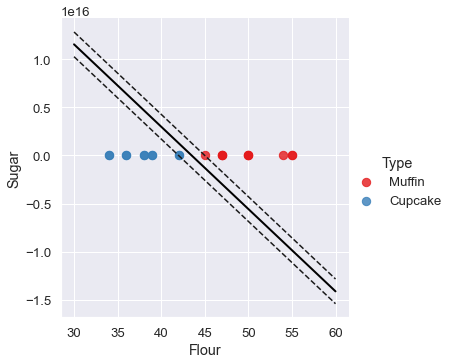

In [23]:
sns.lmplot('Flour','Sugar',data=recipes,hue='Type',
          palette='Set1',fit_reg=False,scatter_kws={"s":70});
plt.plot(xx,yy,linewidth = 2, color= 'black')
# k-- is for discontinuos draw of the parallel hyperplane
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')

In [24]:
# create a function to predict muffin or cupcake
def muffin_or_cupcake(flour,sugar):
    if(model.predict([[flour,sugar]])) == 0:
        print('Muffin recipe')
    else:
        print('Cupcake recipe')
#Predictions
muffin_or_cupcake(50,20)

Muffin recipe


C:\Users\borja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


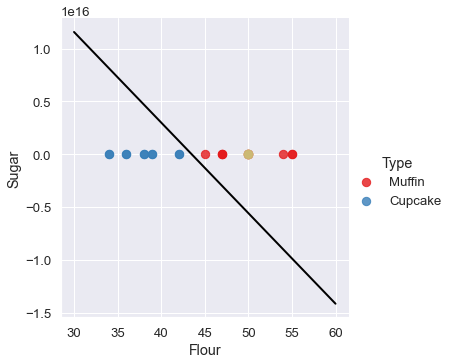

In [26]:
# Plot on the graph
sns.lmplot('Flour','Sugar',data=recipes,hue='Type',
          palette='Set1',fit_reg=False,scatter_kws={"s":70});
plt.plot(xx,yy,linewidth = 2, color= 'black')
plt.plot(50,20,'yo',markersize = '9')